### Simple Linear Regression 

In [47]:
import pandas as  pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [48]:
df = pd.read_csv("D:/Sandesh/100-days-of-machine-learning/day48-simple-linear-regression/placement.csv")
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [49]:
df.shape

(200, 2)

In [50]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

Text(0, 0.5, 'Package in lpa')

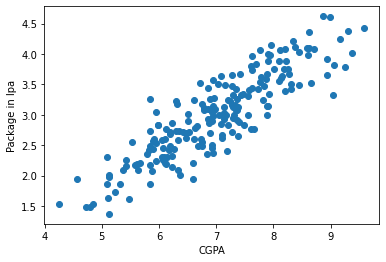

In [51]:
# check whether the data is linear or sort of linear in nature.
plt.scatter(x=df['cgpa'],y=df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package in lpa')

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
x=df[['cgpa']]
y=df[['package']]

In [53]:
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.20,random_state=1)
lr = LinearRegression()

In [54]:
lr.fit(X_train,y_train)

LinearRegression()

In [55]:
y_predict=lr.predict(X_test)

In [56]:
print(r2_score(y_test,y_predict))

0.7764063673475987


In [57]:
X_test.head()

,cgpa
58,6.92
40,9.38
34,7.34
102,5.13
184,7.88


In [58]:
y_test.head()

,package
58,3.09
40,4.02
34,3.42
102,1.37
184,3.14


In [65]:
lr.predict(X_test.iloc[1].values.reshape(1,1))

array([[4.32802487]])

In [20]:
lr.predict(X_test.iloc[1].values.reshape(1,1))

array([[4.32802487]])

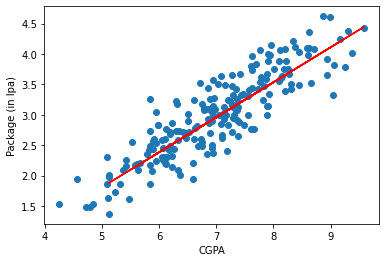

In [21]:
plt.scatter(x=df['cgpa'],y=df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package (in lpa)')
plt.show()

In [22]:
m=lr.coef_
m
# slope values

array([[0.57556302]])

In [55]:
b=lr.intercept_
b
# intercept values 

array([-1.07075625])

In [56]:
m*9.38+b

array([[4.32802487]])

In [57]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [58]:
print("MAE",mean_absolute_error(y_predict,y_test))

MAE 0.2708176687319257


In [59]:
print("MSE",mean_squared_error(y_predict,y_test))

MSE 0.11085592034539729


In [60]:
print("RMSE",np.sqrt(mean_squared_error(y_predict,y_test)))

RMSE 0.3329503271441512


In [61]:
print("R2 score - ",r2_score(y_predict,y_test))


R2 score -  0.7209446534662771


In [62]:
# adjusted r2-score

r2=r2_score(y_predict,y_test)
adj_r2 = 1-((1-r2)*(40-1)/(40-1-1))
print("adjusted r2 score - ",adj_r2)

adjusted r2 score -  0.7136010917153897


## Adding One Irrelevant Features 

In [63]:

# Creating new irrelevant features.

new_df1=df.copy()
new_df1['random_feature']=np.random.random(200)
new_df1=new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.858954,3.26
1,5.12,0.899526,1.98
2,7.82,0.116284,3.25
3,7.42,0.698517,3.67
4,6.94,0.374133,3.57


In [64]:
new_df1.shape

(200, 3)

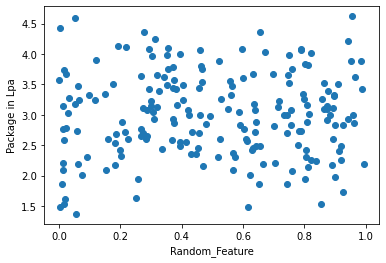

In [65]:
plt.scatter(new_df1['random_feature'],df['package'])
plt.xlabel("Random_Feature")
plt.ylabel("Package in Lpa")
plt.show()

# No relationship between random feature and package.

In [66]:
X=new_df1.drop(columns=['package'],axis=1)
y=new_df1['package']

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)
lr=LinearRegression()
lr.fit(X_train,y_train)
y_predict_new=lr.predict(X_test)

In [74]:
# R2 score has been increased after adding irrelevant features.
print("r2 score - ", r2_score(y_test,y_predict_new))

r2 score -  0.7246711936160517


In [75]:
# adjusted r2 score has been decreased after adding irrelevant features.

r2=r2_score(y_test,y_predict_new)
adjusted_r2=1-((1-r2)*(40-1)/(40-1-2))
print("Adjusted r2 score - ",adjusted_r2)

Adjusted r2 score -  0.7097885554331356


## Adding One Relevant Features.

In [78]:
new_df2=df.copy()
new_df2['iq']=new_df2['package'] +  (np.random.randint(-12,12,200)/10)
new_df2=new_df2[['cgpa','iq','package']]
new_df2.head()

,cgpa,iq,package
0,6.89,3.86,3.26
1,5.12,1.28,1.98
2,7.82,3.15,3.25
3,7.42,4.67,3.67
4,6.94,2.87,3.57


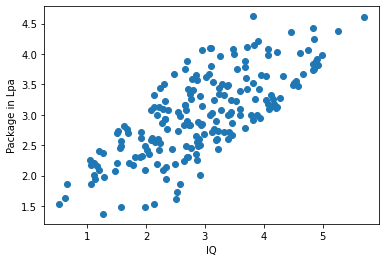

In [79]:
plt.scatter(new_df2['iq'],df['package'])
plt.xlabel("IQ")
plt.ylabel("Package in Lpa")
plt.show()

In [80]:
X=new_df2.drop(columns=['package'],axis=1)
y=new_df2['package']

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)
lr=LinearRegression()
lr.fit(X_train,y_train)
y_predict_new=lr.predict(X_test)

In [82]:
# R2 score has been increased after adding relevant features.
print("r2 score - ", r2_score(y_test,y_predict_new))

r2 score -  0.7962918147246525


In [83]:
# adjusted r2 score has been increased after adding relevant features.

r2=r2_score(y_test,y_predict_new)
adjusted_r2=1-((1-r2)*(40-1)/(40-1-2))
print("Adjusted r2 score - ",adjusted_r2)

Adjusted r2 score -  0.7852805614665256


### THE END 